In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv(r"C:\Users\ADMIN\Downloads\archive (4)\netflix_titles.csv")

df=pd.DataFrame(data)
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [25]:
print(df.head())

  show_id     type                  title         director  \
0      s1    movie   Dick Johnson Is Dead  kirsten johnson   
1      s2  tv show          Blood & Water  lokeshkanagaraj   
2      s3  tv show              Ganglands  julien leclercq   
3      s4  tv show  Jailbirds New Orleans  lokeshkanagaraj   
4      s5  tv show           Kota Factory  lokeshkanagaraj   

                                                cast        country  \
0                                            unknown  united states   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   south africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        unknown   
3                                            unknown        unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          india   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [5]:
for col in df.columns:
    print(col)

show_id
type
title
director
cast
country
date_added
release_year
rating
duration
listed_in
description


In [6]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [26]:
df['director']=df['director'].fillna("LOKESHKANAGARAJ")
df['cast']=df['cast'].fillna("unknown")
df['country']=df['country'].fillna("unknown")


In [10]:
print(df.isnull().sum())

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64


In [12]:
df['date_added']=df['date_added'].fillna(pd.to_datetime(df['release_year'].astype(str) +"-01-01"))

In [17]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [14]:
df['rating']=df['rating'].fillna("NOT RATED")

In [18]:
df['duration']=df['duration'].fillna(df['duration'].mode()[0])

In [19]:
print(df.duplicated().sum())

0


In [28]:
df['type']=df['type'].str.lower().str.strip()
df['country']=df['country'].str.lower().str.strip()
df['director']=df['director'].str.lower().str.strip()
df.columns=df.columns.str.upper().str.strip()

In [31]:
print(df.columns)

Index(['SHOW-ID', 'TYPE', 'TITLE', 'DIRECTOR', 'CAST', 'COUNTRY', 'DATE-ADDED',
       'RELEASE-YEAR', 'RATING', 'DURATION', 'LISTED-IN', 'DESCRIPTION'],
      dtype='object')


In [35]:
df.columns=df.columns.str.strip().str.replace("_","-")
df['RELEASE-YEAR']=df['RELEASE-YEAR'].astype(int)
df['DATE-ADDED']=df['DATE-ADDED'].str.strip()
df['DATE-ADDED']=pd.to_datetime(df['DATE-ADDED'],errors='coerce')

In [39]:
print(df.isnull().sum())

SHOW-ID         0
TYPE            0
TITLE           0
DIRECTOR        0
CAST            0
COUNTRY         0
DATE-ADDED      0
RELEASE-YEAR    0
RATING          0
DURATION        0
LISTED-IN       0
DESCRIPTION     0
dtype: int64


In [38]:
df = df.dropna(subset=['DATE-ADDED'])


In [40]:
df.to_csv("cleaned_dataset.csv", index=False)


In [42]:
print(df['TYPE'].value_counts)

<bound method IndexOpsMixin.value_counts of 0         movie
1       tv show
2       tv show
3       tv show
4       tv show
         ...   
8802      movie
8803    tv show
8804      movie
8805      movie
8806      movie
Name: TYPE, Length: 8797, dtype: object>


NameError: name 'plt' is not defined

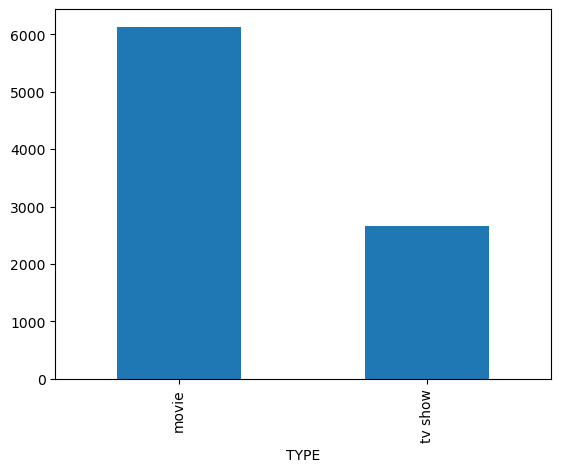

In [43]:
df['TYPE'].value_counts().plot(kind="bar")
plt.title("MOVIES AND TV SHOW")
plt.xlabel("TYPE")
plt.ylabel("count")
plt.show()

In [45]:
print(df['COUNTRY'].value_counts().head(10))



KeyError: 'COUNTRY'

In [46]:
print(df['country'].value_counts().head(10))



country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


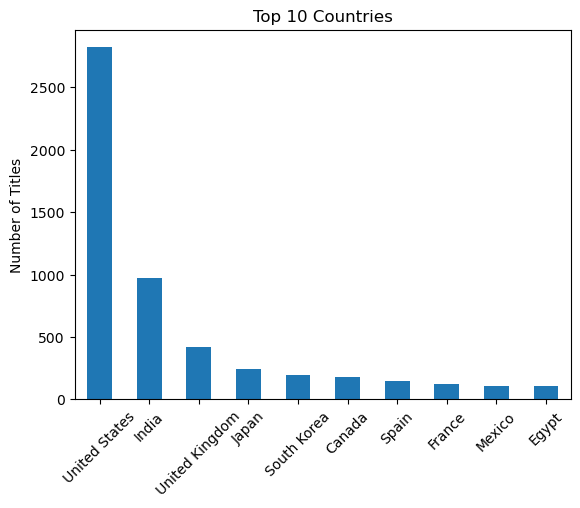

In [52]:
top_countries = df['country'].value_counts().head(10)

top_countries.plot(kind='bar')

plt.title("Top 10 Countries")
plt.xlabel("")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()